In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import approximation
from networkx.algorithms import reciprocity
import matplotlib.pyplot as plt
from collections import Counter
import random
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
import json
import statistics

%matplotlib inline

In [2]:
path = "facebook_combined.txt"

graph = nx.read_edgelist(path, create_using=nx.Graph(), nodetype=int)
number_of_nodes = 100

In [3]:
def extract_local_features(graph):
    centralities = nx.degree_centrality(graph)
    clustering_dict = nx.clustering(graph)
    avg_neighbor_degree_dict = nx.average_neighbor_degree(graph)

    extracted_features = []
    nodes = random.sample(list(graph.nodes()), number_of_nodes)  # Selecting only required number of random nodes
    for node in nodes:
        degree = graph.degree(node)
        centrality = centralities[node]
        avg_neighbor_degree = avg_neighbor_degree_dict[node] if node in avg_neighbor_degree_dict else 0
        clustering_coefficient = clustering_dict[node]
        pagerank = nx.pagerank(graph)[node]
        triads = nx.triangles(graph, node)
        squares = sum(1 for u, v in graph.edges(node) for w in graph.neighbors(v) if graph.has_edge(u, w))

        node_features = [degree, centrality, avg_neighbor_degree, clustering_coefficient, pagerank, triads, squares]
        extracted_features.append(node_features)

    return extracted_features


sample_extracted_nodes = random.sample(list(graph.nodes()), number_of_nodes)
current_graph_piece = graph.subgraph(sample_extracted_nodes)
current_nodes = extract_local_features(current_graph_piece)
current_nodes = np.array(current_nodes)

current_nodes.shape

(100, 7)

In [4]:
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

k = 4
kmeans_model = KMeans(n_clusters=k)
k_labels = kmeans_model.fit_predict(current_nodes)

silhouette = silhouette_score(current_nodes, k_labels)
print("Silhouette Scoring:", silhouette)

Silhouette Scores: 0.6791991818615003


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


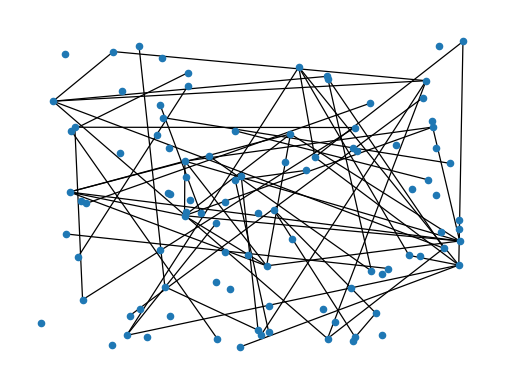

In [11]:
layout = nx.random_layout(current_graph_piece)
plt.axis('off')

nx.draw(current_graph_piece, pos=layout, node_size=20, width=0.9)
plt.show()

In [8]:


outputdf = pd.DataFrame(current_nodes)
outputdf[7] = k_labels
outputdf.head()

,0,1,2,3,4,5,6,7
0,0.0,0.000000,0.0,0.0,0.002429,0.0,0.0,0
1,0.0,0.000000,0.0,0.0,0.002429,0.0,0.0,0
2,0.0,0.000000,0.0,0.0,0.002429,0.0,0.0,0
3,1.0,0.010101,1.0,0.0,0.016194,0.0,0.0,0
4,1.0,0.010101,2.0,0.0,0.012477,0.0,0.0,0


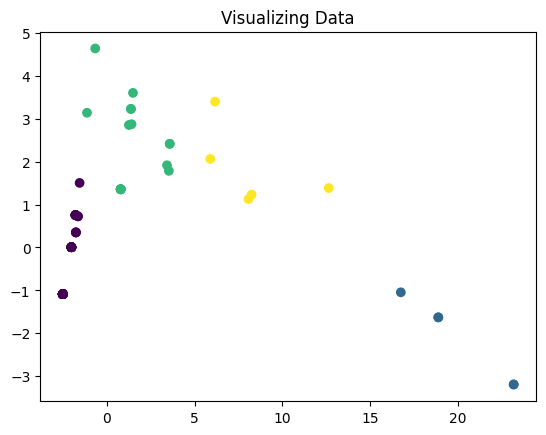

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(outputdf)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=k_labels, cmap='viridis')
plt.title('Visualizing Data')
plt.show()